In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from numpy import pi
import random
import matplotlib.pyplot as plt

In [2]:
# Init Qasm simulator backend
qasm = Aer.get_backend('qasm_simulator')
backend_sim = qasm

In [13]:
def fractal_qc(polarisation, gate_states, nb_half_qubits, iteration):
    init_q = QuantumRegister(1, 'q')
    fract1half_q = QuantumRegister(nb_half_qubits, 'q1')
    fract2half_q = QuantumRegister(nb_half_qubits, 'q2')
    c1half = ClassicalRegister(nb_half_qubits, 'c1')
    c2half = ClassicalRegister(nb_half_qubits, 'c2')
    qc = QuantumCircuit(init_q, fract1half_q, fract2half_q, c1half, c2half)
    
    # Init superposition
    if polarisation == '+':
        qc.h(init_q)
    if polarisation == '-':
        qc.x(init_q)
        qc.h(init_q)
    qc.barrier()
    
    # Circuit
    for i in range(iteration):
        for i in range(nb_half_qubits):
            qc.ch(init_q, fract1half_q[i])
            qc.ch(init_q, fract2half_q[i])
        qc.barrier()

        count = 0
        # Shuffle everything
        for i in range(nb_half_qubits):
            qc.u(pi/gate_states[0][count], pi/gate_states[1][count], pi/gate_states[2][count], fract1half_q[i])
            count += 1
            qc.u(pi/gate_states[0][count], pi/gate_states[1][count], pi/gate_states[2][count], fract2half_q[i])
            count += 1
        qc.barrier()
        for i in range(nb_half_qubits):
            qc.cx(init_q, fract1half_q[i])
            qc.cx(init_q, fract2half_q[i])

        # First half
        qc.barrier()
        qc.measure(fract1half_q, c1half)
        qc.barrier()
        
        # Shuffle only the 2nd half
        for i in range(nb_half_qubits):
            qc.u(pi/gate_states[0][count], pi/gate_states[1][count], pi/gate_states[2][count], fract2half_q[i])
            count += 1
            
        # 2nd half
        qc.barrier()
        qc.measure(fract2half_q, c2half)

    #print(qc.draw())
    
    return qc

In [14]:
def run_qc(qc, backend_sim, shots):
    job = execute(qc, backend_sim, shots=shots, memory=True)
    result_job = job.result().get_counts()
    result_memory = job.result().get_memory()
    
    return result_memory

In [28]:
def coord(result_memory, nb_half_qubits):
    first_half = []
    second_half = []
    for i in result_memory:
        number = ""
        for u in range(nb_half_qubits):
            number = number + i[u]
        first_half.append(number)
        #print("First half : ", number)

        number = ""
        for u in range(nb_half_qubits+1, nb_half_qubits*2+1):
            number = number + i[u]
        second_half.append(number)
        #print("Second half : ", number)

    first_second_half = first_half + second_half
    tab = [[], []]
    for i in first_second_half:
        iteration = first_second_half.count(i)
        if tab[0].count(i) < 1:
            tab[0].append(i)
            tab[1].append(iteration)
    #print(tab)

    x = []
    y = []
    count = 0
    for i in tab[0]:
        add = 0
        for u in range(0, round(nb_half_qubits/2)):
            if i[u] == '1':
                add += 1/((u+1)*2)
        x.append(add)
        add = 0
        for u in range(round(nb_half_qubits/2+1), nb_half_qubits):
            if i[u] == '1':
                add += 1/((u+1)*2)
        y.append(add)

        count += 1
    
    return x, y, tab

In [22]:
gate_states = [[], [], []]
for i in range(30):
    gate_states[0].append(random.uniform(0.1, pi))
    gate_states[1].append(random.uniform(0.1, pi))
    gate_states[2].append(random.uniform(0.1, pi))

### |+>

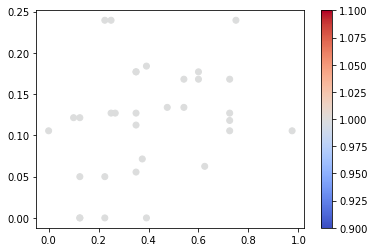

In [31]:
nb_half_qubits = 10
iteration = 1
shots = 16     # If iteration is high, put a little number of shots
qc = fractal_qc('+', gate_states, nb_half_qubits, iteration)
result_qc = run_qc(qc, backend_sim, shots)
x, y, tab = coord(result_qc, nb_half_qubits)
plt.scatter(x, y, c=tab[1], cmap="coolwarm")
plt.colorbar()

### |->

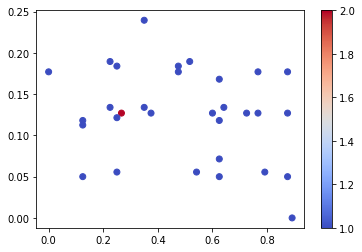

In [30]:
nb_half_qubits = 10
iteration = 1
shots = 16     # If iteration is high, put a little number of shots. Else do as you want
qc = fractal_qc('-', gate_states, nb_half_qubits, iteration)
result_qc = run_qc(qc, backend_sim, shots)
x, y, tab = coord(result_qc, nb_half_qubits)
plt.scatter(x, y, c=tab[1], cmap="coolwarm")
plt.colorbar()

In [163]:
# Circuit drawing

nb_half_qubits = 10
init_q = QuantumRegister(1, 'q')
fract1half_q = QuantumRegister(nb_half_qubits, 'q1')
fract2half_q = QuantumRegister(nb_half_qubits, 'q2')
c1half = ClassicalRegister(nb_half_qubits, 'c1')
c2half = ClassicalRegister(nb_half_qubits, 'c2')
qc = QuantumCircuit(init_q, fract1half_q, fract2half_q, c1half, c2half)

def data(nqubits):
    qc = QuantumCircuit(nqubits)
    U_s = qc.to_gate()
    U_s.name = "$data$"
    return U_s

def upload(nqubits):
    qc = QuantumCircuit(nqubits)
    U_s = qc.to_gate()
    U_s.name = "$data_upload$"
    return U_s

def shuffle_all(nqubits):
    qc = QuantumCircuit(nqubits)
    U_s = qc.to_gate()
    U_s.name = "$shuffle$"
    return U_s

def cx_gates(nqubits):
    qc = QuantumCircuit(nqubits)
    U_s = qc.to_gate()
    U_s.name = "$CX Gates$"
    return U_s

def measure(nqubits):
    qc = QuantumCircuit(nqubits, nqubits)
    U_s = qc.to_gate()
    U_s.name = "$Measure$"
    return U_s

def shuffle_2half(nqubits):
    qc = QuantumCircuit(nqubits)
    U_s = qc.to_gate()
    U_s.name = "$Shuffle$"
    return U_s

qc.append(data(1), [0])

for i in range(1):
    qc.barrier()
    qc.append(upload(21), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
    qc.append(shuffle_all(20), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
    qc.append(cx_gates(21), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
    qc.measure(fract1half_q, c1half)
    qc.append(shuffle_2half(10), [11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
    qc.measure(fract2half_q, c2half)
    qc.barrier()

qc.draw()

┌────────┐ ░ ┌─────────────────┐               ┌──────────────┐         »
  q_0: ┤ $data$ ├─░─┤0                ├───────────────┤0             ├─────────»
       └────────┘ ░ │                 │┌─────────────┐│              │┌─┐      »
 q1_0: ───────────░─┤1                ├┤0            ├┤1             ├┤M├──────»
                  ░ │                 ││             ││              │└╥┘┌─┐   »
 q1_1: ───────────░─┤2                ├┤1            ├┤2             ├─╫─┤M├───»
                  ░ │                 ││             ││              │ ║ └╥┘┌─┐»
 q1_2: ───────────░─┤3                ├┤2            ├┤3             ├─╫──╫─┤M├»
                  ░ │                 ││             ││              │ ║  ║ └╥┘»
 q1_3: ───────────░─┤4                ├┤3            ├┤4             ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q1_4: ───────────░─┤5                ├┤4            ├┤5             ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q1_5: ───────────░─┤6                ├┤5            ├┤6             ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q1_6: ───────────░─┤7                ├┤6            ├┤7             ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q1_7: ───────────░─┤8                ├┤7            ├┤8             ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q1_8: ───────────░─┤9                ├┤8            ├┤9             ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q1_9: ───────────░─┤10 $data_upload$ ├┤9            ├┤10 $CX Gates$ ├─╫──╫──╫─»
                  ░ │                 ││   $shuffle$ ││              │ ║  ║  ║ »
 q2_0: ───────────░─┤11               ├┤10           ├┤11            ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q2_1: ───────────░─┤12               ├┤11           ├┤12            ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q2_2: ───────────░─┤13               ├┤12           ├┤13            ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q2_3: ───────────░─┤14               ├┤13           ├┤14            ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q2_4: ───────────░─┤15               ├┤14           ├┤15            ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q2_5: ───────────░─┤16               ├┤15           ├┤16            ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q2_6: ───────────░─┤17               ├┤16           ├┤17            ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q2_7: ───────────░─┤18               ├┤17           ├┤18            ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q2_8: ───────────░─┤19               ├┤18           ├┤19            ├─╫──╫──╫─»
                  ░ │                 ││             ││              │ ║  ║  ║ »
 q2_9: ───────────░─┤20               ├┤19           ├┤20            ├─╫──╫──╫─»
                  ░ └─────────────────┘└─────────────┘└──────────────┘ ║  ║  ║ »
c1: 10/════════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                       0  1  2 »
c2: 10/════════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                                         ░ 
«  q_0: ──────────────────────────────────────────────────────────────────░─
«                                             

In [184]:
import sys

original_stdout = sys.stdout

with open('circuit_draw.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(qc.draw())
    sys.stdout = original_stdout # Reset the standard output to its original value